In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models

#Loading the data

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Teeth DataSet.zip to Teeth DataSet.zip


In [14]:
#unziping the file

import zipfile
import os

zip_file_path = '/content/Teeth DataSet.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [15]:
train_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Training'
test_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Testing'
validation_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Validation'

###visualizing the data befor data augmentation

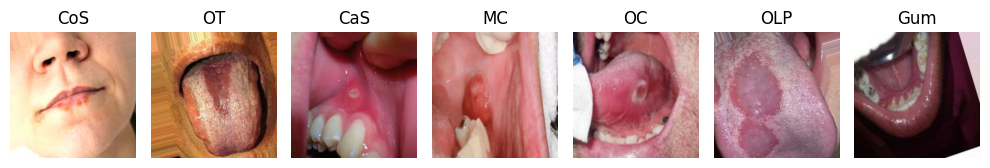

In [16]:
import os
import random
import matplotlib.pyplot as plt
import cv2

data_dir = "/content/dataset/Teeth DataSet/Teeth_Dataset/Training"
classes = os.listdir(data_dir)

#Set up a figure for plotting
fig = plt.figure(figsize=(10, 7))

#Loop through each class
for i, class_name in enumerate(classes, start=1):
    class_dir = os.path.join(data_dir, class_name)
    # List all images in the class directory
    images = os.listdir(class_dir)

    # Pick a random image from the class
    random_image = random.choice(images)
    image_path = os.path.join(class_dir, random_image)

    # Load and plot the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert colors from BGR to RGB

    # Add subplot for the current class
    ax = fig.add_subplot(1, len(classes), i)
    ax.set_title(class_name)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

###Data generator with augmentation

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Creating a data generator for validation and test (no augmentation, just rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
#loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the validation data
validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the test data
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


###visualizing the data after data augmentation

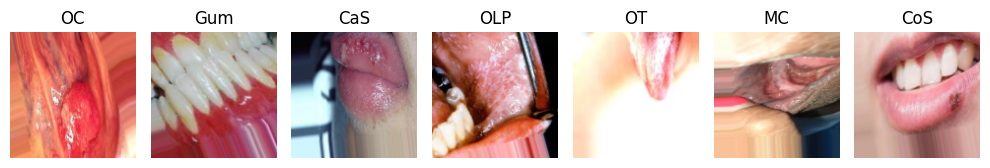

In [19]:
# Get class indices
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

# Create a dictionary to store one image per class
class_images = {}

# Loop until we have one image per class
for _ in range(100):  # Arbitrary large number to ensure all classes are covered
    img_batch, label_batch = next(train_generator)  # Get a batch of augmented images and labels
    for img, label in zip(img_batch, label_batch):
        class_index = np.argmax(label)
        class_name = classes[class_index]
        if class_name not in class_images:
            # Convert the image from [0, 1] to [0, 255] and ensure it's uint8
            img_uint8 = (img * 255).astype(np.uint8)
            class_images[class_name] = img_uint8
        if len(class_images) == len(classes):  # Stop if we have one image per class
            break
    if len(class_images) == len(classes):
        break

# Set up a figure for plotting
fig = plt.figure(figsize=(10, 7))

# Plot one random image from each class
for i, (class_name, img) in enumerate(class_images.items(), start=1):
    ax = fig.add_subplot(1, len(classes), i)
    ax.set_title(class_name)
    ax.imshow(img)  # Now the image is in uint8 format
    ax.axis('off')

plt.tight_layout()
plt.show()


#Training the model

In [20]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [21]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 46s 398ms/step - accuracy: 0.1611 - loss: 4.0318 - val_accuracy: 0.1751 - val_loss: 2.2654
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.1904 - loss: 2.1621 - val_accuracy: 0.1702 - val_loss: 1.8855
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.2211 - loss: 1.9201 - val_accuracy: 0.2111 - val_loss: 1.8637
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 80s 393ms/step - accuracy: 0.2160 - loss: 1.9108 - val_accuracy: 0.2218 - val_loss: 1.8915
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 397ms/step - accuracy: 0.2318 - loss: 1.9049 - val_accuracy: 0.2296 - val_loss: 1.8516
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 408ms/step - accuracy: 0.2484 - loss: 1.8599 - val_accuracy: 0.2821 - val_loss: 1.8151
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - accuracy: 0.2734 - loss: 1.8208 - val_accuracy: 0.2111 - val_loss: 1.9845
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 80s 400ms/step - accuracy: 0.2463 - loss: 1.8400 - val_accuracy: 0.243

In [23]:
eval = model.evaluate(test_generator)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3168 - loss: 1.6683
Test Loss: 1.6679433584213257
Test Accuracy: 0.3278210163116455


#Another approach

In [24]:
#Creating CNN model

IMG_SIZE = 128
model2 = tf.keras.models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Conv2D(256, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(7, activation='softmax')
])
model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,769,287 (18.19 MB)

 Trainable params: 4,769,287 (18.19 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model2.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
history = model2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.1839 - loss: 1.9556 - val_accuracy: 0.1693 - val_loss: 1.9154
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.1797 - loss: 1.9168 - val_accuracy: 0.2529 - val_loss: 1.8550
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.2339 - loss: 1.8592 - val_accuracy: 0.3239 - val_loss: 1.7573
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.2953 - loss: 1.7758 - val_accuracy: 0.3804 - val_loss: 1.6717
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.3001 - loss: 1.7412 - val_accuracy: 0.3784 - val_loss: 1.5943
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.3559 - loss: 1.6251 - val_accuracy: 0.3356 - val_loss: 1.6362
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.3777 - loss: 1.5730 - val_accuracy: 0.4504 - val_loss: 1.4725
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.4286 - loss: 1.5180 - val_accuracy: 0.4796 - v

In [27]:
eval = model2.evaluate(test_generator)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step - accuracy: 0.9316 - loss: 0.2018
Test Loss: 0.21241039037704468
Test Accuracy: 0.9280155897140503


In [33]:
# After training the model
!mkdir models
model2.save('models/teeth_classification_model.keras')


In [34]:
from google.colab import files
files.download('models/teeth_classification_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
!pip install streamlit -q

In [44]:
!wget -q -O - ipv4.icanhazip.com

34.66.119.104


In [40]:
!npm install -g localtunnel@2.0.2


changed 22 packages, and audited 23 packages in 878ms

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.66.119.104:8501

your url is: https://gentle-boxes-agree.loca.lt
2024-08-28 03:25:03.084096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 03:25:03.130155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 03:25:03.145802: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 03:25:05.469108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 ━━━━━━━━━━━━━